## 1. Import Necessary Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.graphics.tsaplots as tsa_plots #For ACF anf PACF
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal_decompose Plot
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # Simp Expo Smoothing
from statsmodels.tsa.holtwinters import Holt # Holt's trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt's Winter
from statsmodels.tsa.arima_model import ARMA # ARMA Model
from statsmodels.tsa.arima_model import ARIMA # ARIMA Model

from sklearn.metrics import mean_absolute_percentage_error

## 2. Import Data

In [16]:
footfalls=pd.read_csv('footfalls.csv')
footfalls

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


## 3. Data Understanding

### Initial Analysis

In [6]:
footfalls.shape

(159, 17)

In [7]:
footfalls.isna().sum()

Month            0
Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

In [8]:
footfalls.dtypes

Month             object
Footfalls          int64
t                  int64
log_footfalls    float64
t_square           int64
Jan                int64
Feb                int64
Mar                int64
Apr                int64
May                int64
Jun                int64
Jul                int64
Aug                int64
Sep                int64
Oct                int64
Nov                int64
Dec                int64
dtype: object

### Data Visualization

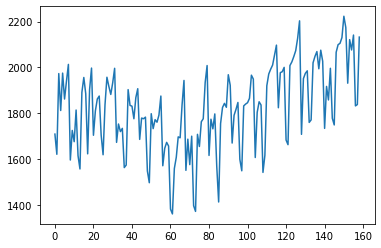

In [9]:
footfalls['Footfalls'].plot()
plt.show()

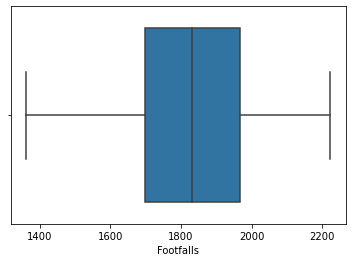

In [10]:
sns.boxplot(footfalls['Footfalls'])
plt.show()

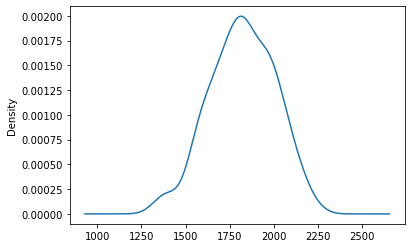

In [13]:
footfalls['Footfalls'].plot(kind='kde')
plt.show()

## 4. Data Preprocessing

In [17]:
footfalls['Date']=pd.to_datetime(footfalls['Month'],format="%b-%y")
footfalls.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01


In [18]:
footfalls['month']=footfalls['Date'].dt.strftime('%b') #Extract Month
footfalls.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May


In [19]:
footfalls['year']=footfalls['Date'].dt.strftime('%y') #Extract Year
footfalls.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,91


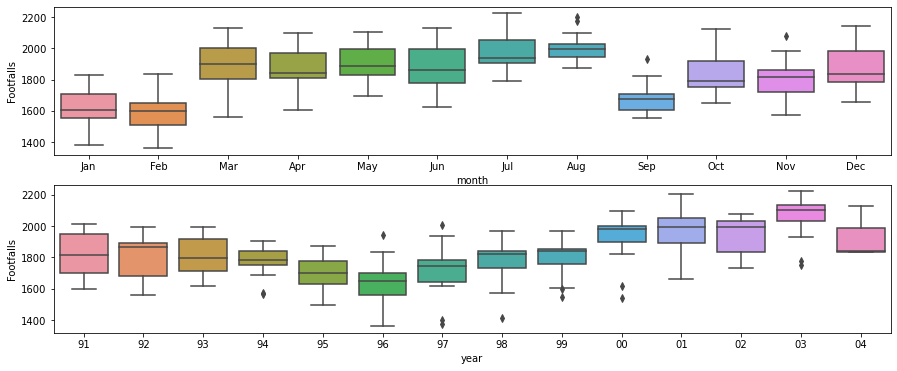

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.boxplot(x="month",y="Footfalls",data=footfalls)
plt.subplot(2,1,2)
sns.boxplot(x="year",y="Footfalls",data=footfalls)
plt.show()

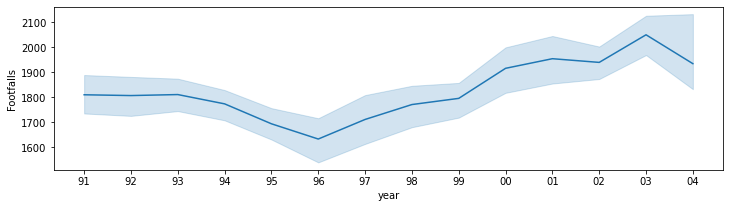

In [21]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=footfalls)
plt.show()

#### Lag Plot

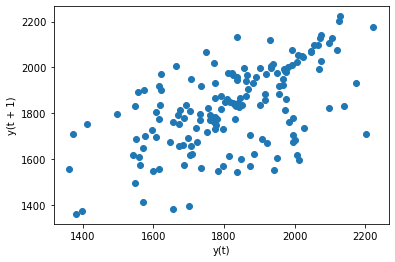

In [22]:
pd.plotting.lag_plot(footfalls['Footfalls'])
plt.show()

### ACF and PACF

**ACF** - plot between lags and values of correlation

**PACF** - partial auto-correlation function, plot between lags and residuals 

(Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals)

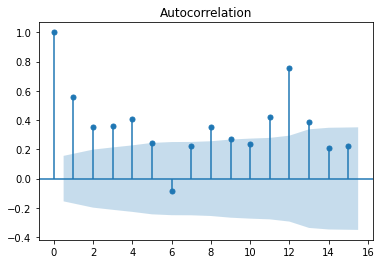

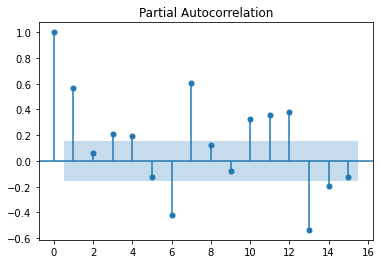

In [24]:
tsa_plots.plot_acf(footfalls.Footfalls,lags=15)
tsa_plots.plot_pacf(footfalls.Footfalls,lags=15)
plt.show()

### Time Series Decomposition Plot

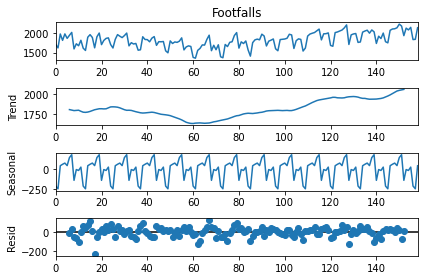

In [26]:
decompose_ts=seasonal_decompose(footfalls['Footfalls'], period=12) # Period=Seasonal pattern: Our data contains month wise
decompose_ts.plot()
plt.show()

## 5. Model Building|| 6. Model Training || 7. Model Evaluation

### Data Splitting

In [27]:
train=footfalls.head(147)
test=footfalls.head(12)

In [28]:
train.shape

(147, 20)

In [29]:
test.shape

(12, 20)

## Model Based Forecasting

### Linear Model

In [31]:
linear_model = smf.ols('Footfalls~t',data=train).fit()
linear_pred=linear_model.predict(test['t'])

linear_rms=mean_absolute_percentage_error(test['Footfalls'],linear_pred)*100
linear_rms

7.196752346060398

### Exponential model

In [34]:
exp_model = smf.ols('log_footfalls~t',data=train).fit()
pred_exp = exp_model.predict(test['t'])
                             
rmse_exp = mean_absolute_percentage_error(test['Footfalls'],pred_exp)*100
rmse_exp                             

99.58596348084873

### Quadratic

In [35]:
quad_model = smf.ols('Footfalls~t+t_square',data=train).fit()
pred_quad = quad_model.predict(test[['t','t_square']])

rmse_quad = mean_absolute_percentage_error(test['Footfalls'],pred_quad)*100
rmse_quad

6.850410061112513

### Additive seasonality

In [36]:
additive_seasonality = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_additive = additive_seasonality.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])

rmse_add_sea = mean_absolute_percentage_error(test['Footfalls'],pred_additive)*100
rmse_add_sea

3.3889077626072828

### Additive Seasonality Quadratic

In [37]:
additive_seasonality_quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_quad = additive_seasonality_quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']])

rmse_add_sea_quad = mean_absolute_percentage_error(test['Footfalls'],pred_add_quad)*100
rmse_add_sea_quad

3.3318571769725405

### Multiplicative Seasonality

In [38]:
multiplicative_seasonality = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_multi = multiplicative_seasonality.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])

rmse_mult_sea = mean_absolute_percentage_error(test['Footfalls'],pred_multi)*100
rmse_mult_sea

99.58370404869235

### Multiplicative Additive Seasonality

In [41]:
mul_add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_Mult_add_sea = mean_absolute_percentage_error(test['Footfalls'],pred_mult_add_sea)*100
rmse_Mult_add_sea 

99.58619493838664

## Data Driven Forecasting

### Moving Average

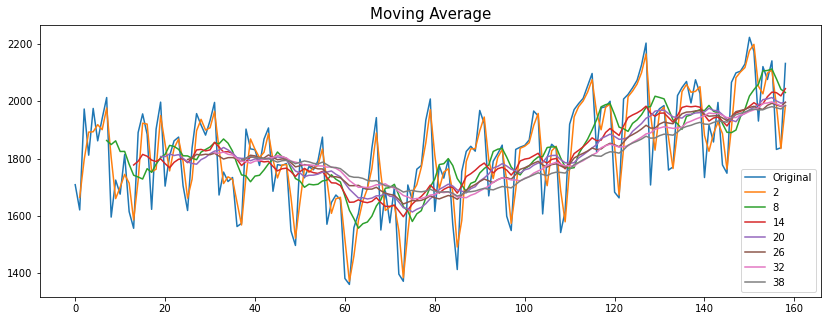

In [45]:
plt.figure(figsize=(14,5))
footfalls['Footfalls'].plot(label='Original')
for i in range(2,44,6):
    footfalls['Footfalls'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.title('Moving Average', size=15)
plt.show()

### Simple Exponential Smoothing Method

In [48]:
ses_model= SimpleExpSmoothing(train['Footfalls']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0], end=test.index[-1])

ses_rms=mean_absolute_percentage_error(pred_ses, test['Footfalls'])*100
ses_rms

6.965650348746009

### Holt's Trend Method

In [50]:
hw_model = Holt(train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2) # two levels of smoothening
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
hw_rms=mean_absolute_percentage_error(pred_hw,test['Footfalls'])*100 
hw_rms

7.2422135529221405

### Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend

In [55]:
# forcast - based on current time, trend, seasonality
# three levels of smoothening

hwe_model_mul_add = ExponentialSmoothing(train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])

hw_ma_rms=mean_absolute_percentage_error(pred_hwe_mul_add,test['Footfalls'])*100 
hw_ma_rms

2.0690895593580163

In [52]:
# forcast - based on current time, trend, seasonality
# three levels of smoothening

hwe_model_mul_add = ExponentialSmoothing(train["Footfalls"],seasonal="add",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])

hw_ma_rms=mean_absolute_percentage_error(pred_hwe_mul_add,test['Footfalls'])*100 
hw_ma_rms

2.134235501238244

### Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend

In [53]:
hwe_model_add_add = ExponentialSmoothing(train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])

hw_aa_rms=mean_absolute_percentage_error(pred_hwe_add_add,test['Footfalls'])*100 
hw_aa_rms

2.13079118075476

### ARMA Model

In [63]:
ARMAmodel = ARMA(train['Footfalls'], order=(1, 0)) #model with AR=1 and MA=0
ARMAmodel_fit = ARMAmodel.fit()

ARMA_pred = ARMAmodel_fit.predict(0,11)
ARMA_pred

arma_rms=mean_absolute_percentage_error(ARMA_pred,test['Footfalls'])*100 
arma_rms

6.9670648020934465

### ARIMA

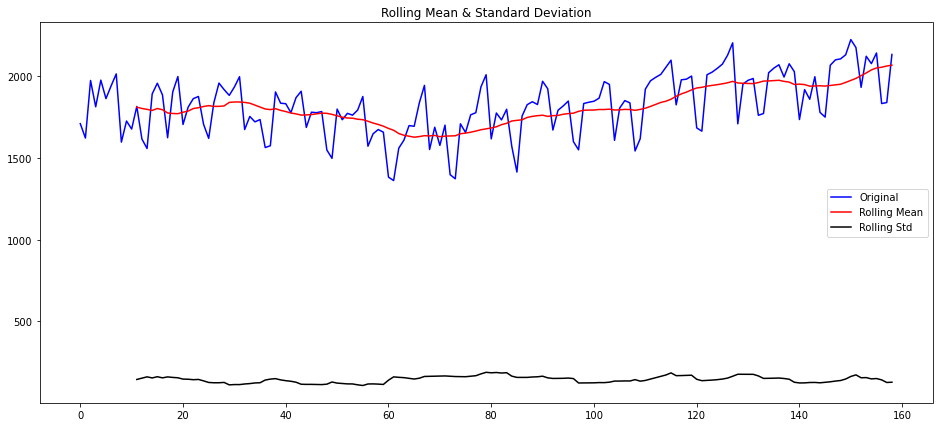

In [69]:
rolLmean = footfalls['Footfalls'].rolling(12).mean() # 12 entries
rolLstd = footfalls['Footfalls'].rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(footfalls['Footfalls'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

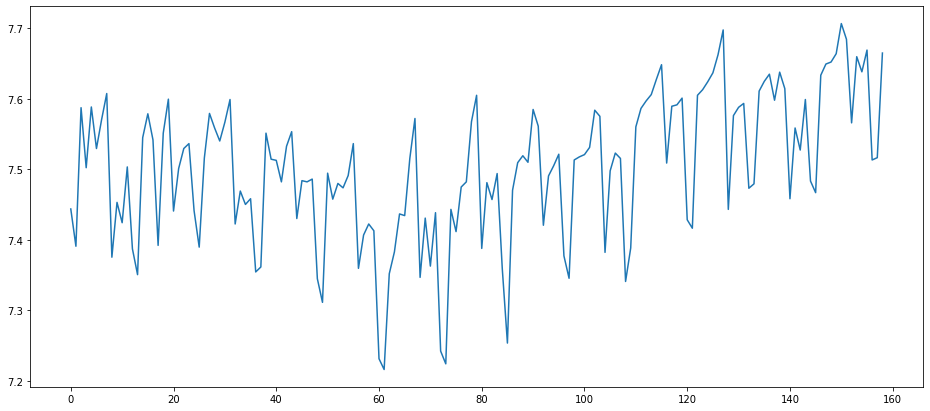

In [70]:
#Log Transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(footfalls['Footfalls'])#to transform to stationary from non-stationary
plt.plot(ts_log)
plt.show()

#### Differencing

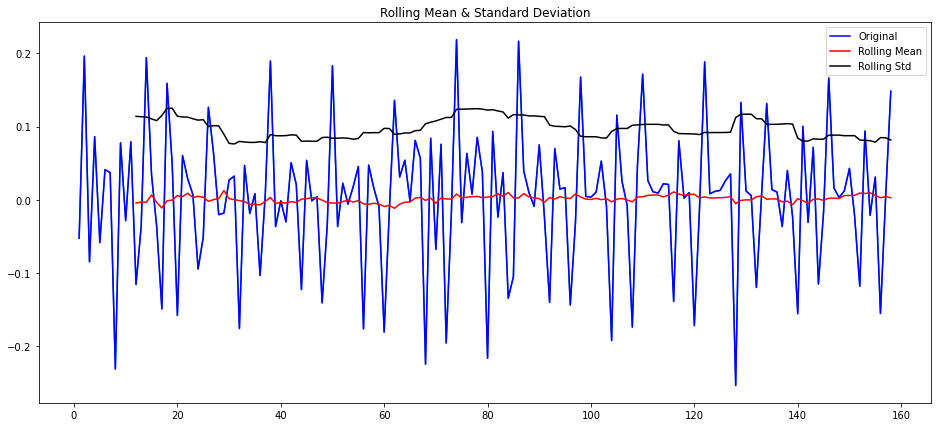

In [71]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift(periods=1) # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [73]:
#ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12)

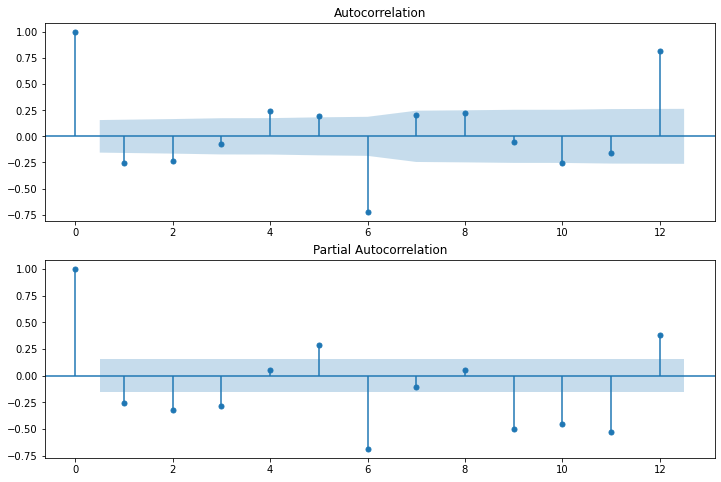

In [74]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=12,ax=ax2)

In [75]:
import itertools
p = range(0,5) #AR order
d = range(0,5) #Shift
q = range(0,5) #MA order
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [77]:
for param in pdq:
    try:
        model_arima = ARIMA(train['Footfalls'],order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1931.256183015908
(0, 0, 1) 1897.539094588714
(0, 0, 2) 1889.9175078111439
(0, 0, 3) 1896.0608713205302
(0, 0, 4) 1873.327609689666
(0, 1, 0) 1916.695808079199
(0, 1, 1) 1887.028315116491
(0, 1, 2) 1872.799662003168
(0, 1, 3) 1874.6943495687512
(0, 1, 4) 1859.1133891721272
(0, 2, 0) 2037.2005485498833
(0, 2, 1) 1911.5543418541058
(0, 2, 2) 1885.1403986141063
(0, 2, 3) 1871.4116988755388
(0, 2, 4) 1874.701060428335
(1, 0, 0) 1890.539301528449
(1, 0, 1) 1892.1352138313096
(1, 0, 2) 1885.5097795861293
(1, 0, 3) 1887.0878455730713
(1, 0, 4) 1866.457729612035
(1, 1, 0) 1908.2073751527723
(1, 1, 1) 1874.2242614086613
(1, 1, 2) 1875.3967569620736
(1, 1, 3) 1869.9877823156576
(1, 1, 4) 1857.5228140871975
(1, 2, 0) 1995.6571927275386
(1, 2, 1) 1903.6142395010954
(1, 2, 2) 1915.4356646611975
(1, 2, 3) 1871.5873970723123
(1, 2, 4) 1873.300604185285
(2, 0, 0) 1892.4444755604718
(2, 0, 1) 1892.5852881600267
(2, 0, 2) 1887.8639128222476
(2, 0, 4) 1855.5350427705523
(2, 1, 0) 1893.765125805

In [78]:
### from statsmodels.tsa.arima_model import ARIMA

ARIMAmodel = ARIMA(train['Footfalls'], order=(4, 0, 4)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit()

ARIMA_pred = ARIMA_model_fit.predict(1,12,typ='levels')

arima_rms=mean_absolute_percentage_error(ARIMA_pred,test['Footfalls'])*100
arima_rms

5.2416591201542895

## The End!!!